In [12]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, product
import numpy as np

In [ ]:
def is_laplacian_integer_graph(G):
    laplace = nx.laplacian_matrix(G).toarray()  # Laplacova matrika v toarray formatu (za lažje računanje)
    eigenvalues = np.linalg.eigvals(laplace) # Lastne vrednosti
    return all(np.isclose(ev, np.round(ev), atol=1e-10) for ev in eigenvalues)  # Numerično računanje

In [ ]:
def unicyclic_graphs_with_central_node(n, cycle_length):
    graphs = []

    cycle_graph = nx.cycle_graph(cycle_length)
    cycle_nodes = list(cycle_graph.nodes)

    for i in range(cycle_length + 1, n + 1):
        full_graph = cycle_graph.copy() 
        remaining_nodes = list(range(cycle_length, i))  

        central_node = cycle_nodes[0]
        
        for node in remaining_nodes:
            full_graph.add_node(node)
            full_graph.add_edge(central_node, node)

        if len(list(nx.cycle_basis(full_graph))) == 1:
            graphs.append(full_graph)

    return graphs

In [ ]:
def draw_graphs(graphs):
    for i, graph in enumerate(graphs):
        plt.figure(figsize=(6, 6))
        pos = nx.spring_layout(graph) 
        nx.draw(graph, pos, with_labels=True, node_color='gold', node_size=700, edge_color='black')
        plt.title(f"Graph {i + 1}")
        plt.show()

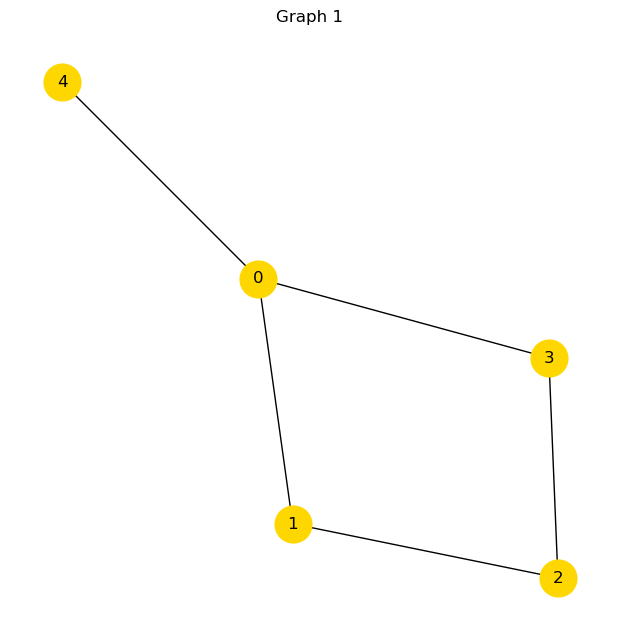

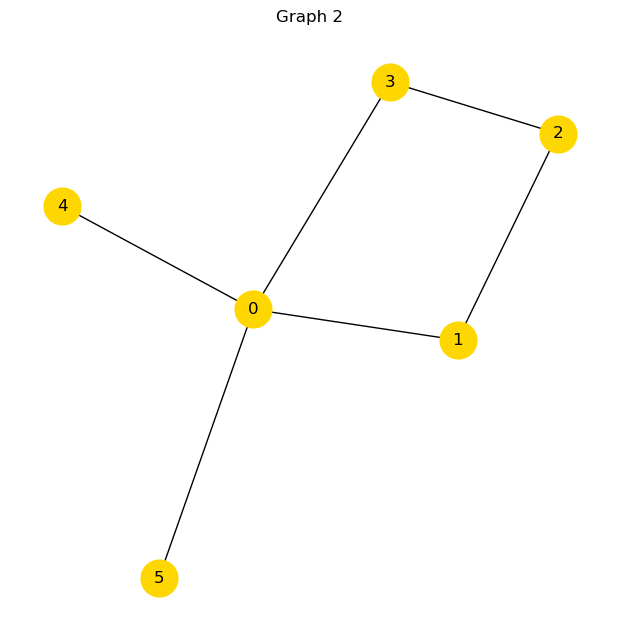

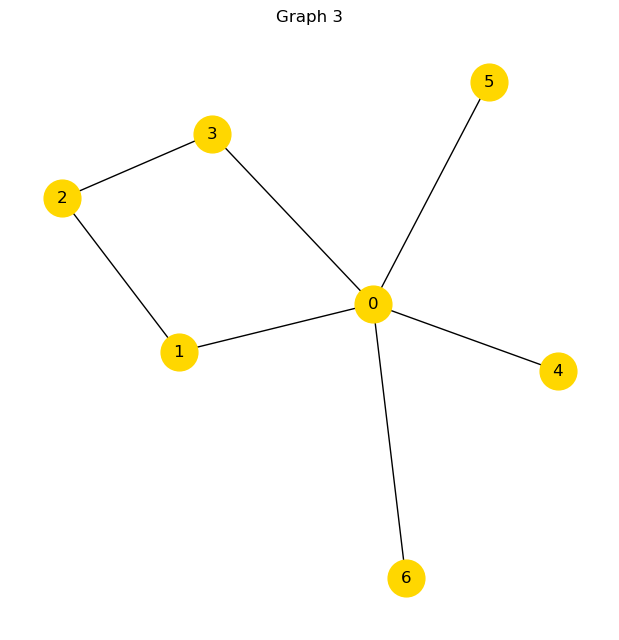

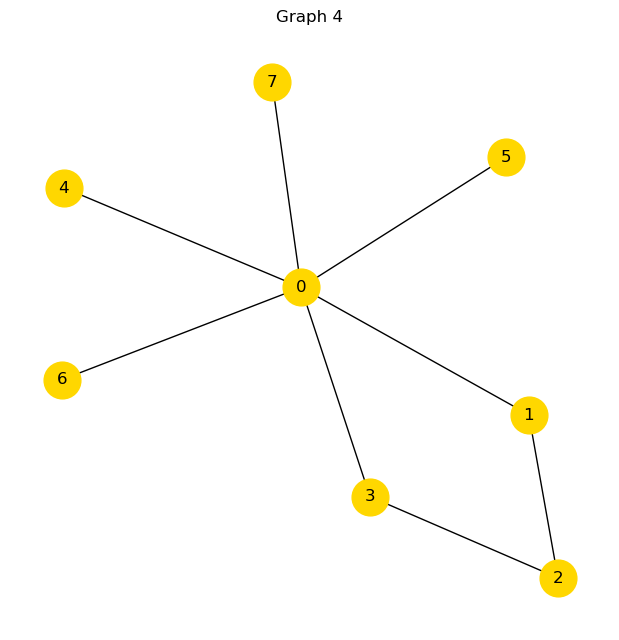

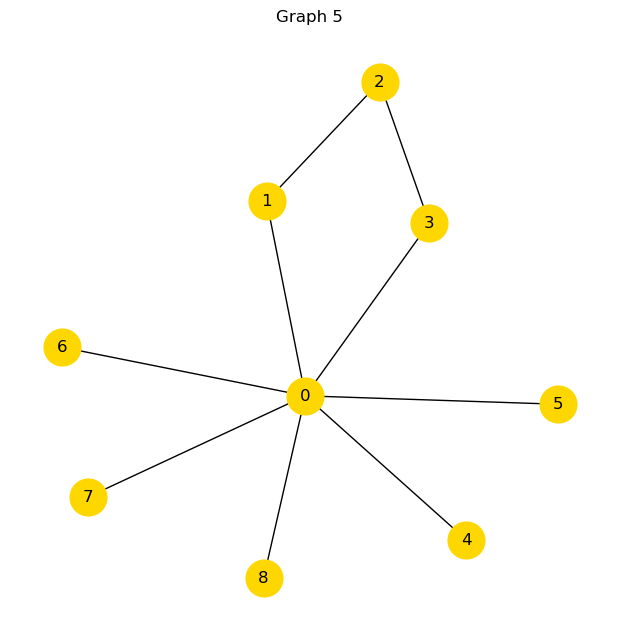

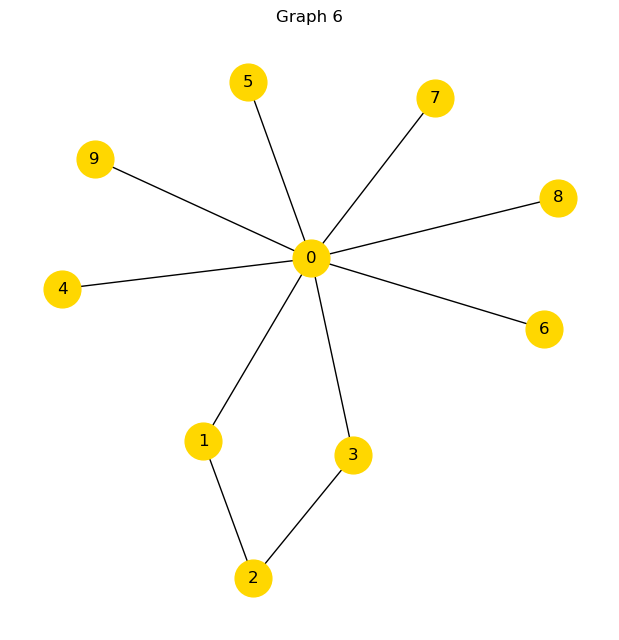

In [114]:
n = 10
cycle_length = 4
graphs = unicyclic_graphs_with_central_node(n, cycle_length)
draw_graphs(graphs)

In [124]:
def unicyclic_laplacian_integer_graphs_with_central_node(n, cycle_length):
    graphs = unicyclic_graphs_with_central_node(n, cycle_length)

    laplacian_graphs = []
    for graph in graphs:
        if is_laplacian_integer_graph(graph):
            laplacian_graphs.append(graph)

    print(f"Number of graphs with length of cycle {cycle_length} : {len(graphs)}")
    print(f"Total Laplacian integer graphs found: {len(laplacian_graphs)}")
    print()

### Hypotesis: Graphs with cycle of length 3 with central node are laplcian for all n>=3 and lenght 3 is the only lenght of cycle that this statement holds true

In [125]:
n = 100
for i in range(3, 100):
    unicyclic_laplacian_integer_graphs_with_central_node(n, i)

Number of graphs with length of cycle 3 : 97
Total Laplacian integer graphs found: 97

Number of graphs with length of cycle 4 : 96
Total Laplacian integer graphs found: 0

Number of graphs with length of cycle 5 : 95
Total Laplacian integer graphs found: 0

Number of graphs with length of cycle 6 : 94
Total Laplacian integer graphs found: 0

Number of graphs with length of cycle 7 : 93
Total Laplacian integer graphs found: 0

Number of graphs with length of cycle 8 : 92
Total Laplacian integer graphs found: 0

Number of graphs with length of cycle 9 : 91
Total Laplacian integer graphs found: 0

Number of graphs with length of cycle 10 : 90
Total Laplacian integer graphs found: 0

Number of graphs with length of cycle 11 : 89
Total Laplacian integer graphs found: 0

Number of graphs with length of cycle 12 : 88
Total Laplacian integer graphs found: 0

Number of graphs with length of cycle 13 : 87
Total Laplacian integer graphs found: 0

Number of graphs with length of cycle 14 : 86
Tot